# DSC 550 

### Week 4:  Exercise 4.2

Author: Kimberly Cable<br>
Date: 7-2-2022

## Exercise 4.2: Predicting Fuel Efficiency

In this exercise, you will build a linear regression model to predict fuel efficiency (miles per gallon) of automobilies. Download the auto-mpg.csv dataset from: Auto-mpg dataset.

**1. Load the data as a Pandas data frame and ensure that it imported correctly.**

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Read data file
try:
    auto_df = pd.read_csv("auto-mpg.csv")
except Exception:
    print("There was an error reading the Auto MPG file")
    
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**2. Begin by prepping the data for modeling:**

    a. Remove the car name column
    
    b. The horsepower column values likely imported as a string data type. Figure out why and replace any strings wit the column mean.
    
    c. Create dummy variables for the origin column  

In [4]:
# remove car name column
auto_cleaned = auto_df.drop('car name', axis = 1)
auto_cleaned.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
# check horsepower for non-numeric data
auto_cleaned[pd.to_numeric(auto_cleaned['horsepower'], errors='coerce').isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [6]:
# Convert non-numeric data to NaN
auto_cleaned['horsepower'] = pd.to_numeric(auto_cleaned['horsepower'], errors = 'coerce')

# Fill in NaN with mean horsepower
auto_cleaned['horsepower'] = auto_cleaned['horsepower'].fillna(auto_cleaned['horsepower'].mean())

# check horsepower for non-numeric data
auto_cleaned[pd.to_numeric(auto_cleaned['horsepower'], errors='coerce').isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin


In [7]:
# Get unique values for origin
auto_cleaned['origin'].unique()

array([1, 3, 2], dtype=int64)

In [8]:
# Create dummy variables for origin
auto_cleaned = pd.get_dummies(auto_cleaned, columns = ['origin'])

auto_cleaned.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


**3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?**

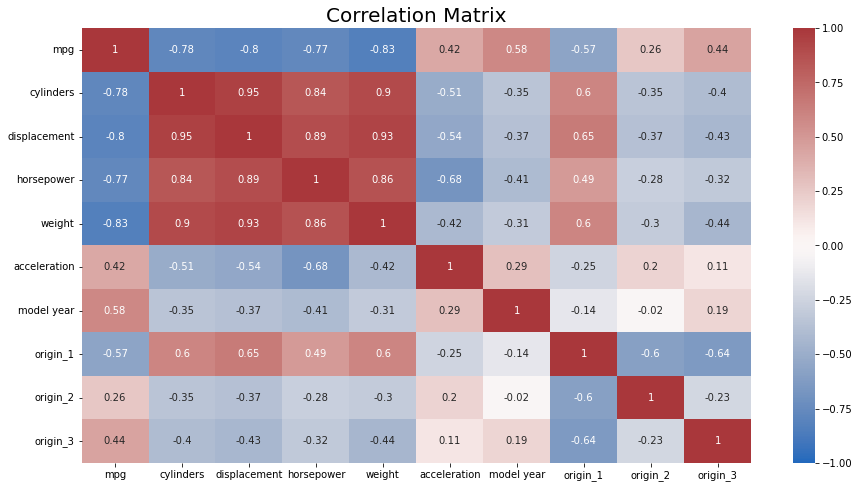

In [9]:
# Get pearsons correlation of numeric columns and round to 2 decimal places
pearson_corr = auto_cleaned.corr(method = 'pearson').round(2)

# create figure
plt.figure(figsize = (15, 8))

# Customize title
plt.title("Correlation Matrix", fontsize = 20)

# Create heatmap of correlations
sns.heatmap(pearson_corr, annot = True, vmax = 1, vmin = -1, center = 0, cmap = 'vlag')

# display chart
plt.show()

Looking at the correlation heatmap, cylinders, displacement, horsepower, and weight are highly correlated to mpg.

**4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation.**

Text(0, 0.5, 'Weight')

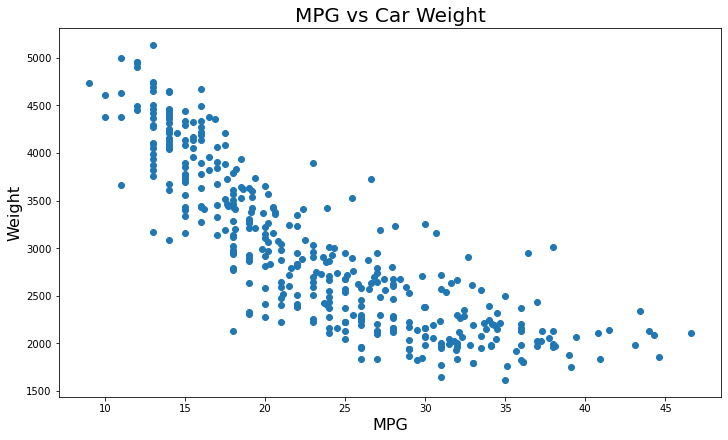

In [10]:
# Create figure
fig, ax = plt.subplots(1, 1, figsize = (10, 6), layout = 'constrained')

# Create plot
ax.scatter(auto_cleaned['mpg'], auto_cleaned['weight'])

# Customize labels
ax.set_title("MPG vs Car Weight", fontsize = 20)
ax.set_xlabel("MPG", fontsize = 16)
ax.set_ylabel("Weight", fontsize = 16)

The correlation between MPG and Weight is -0.83 which indicates a negative correlation between the two variables. We can see in the scatterplot the two do have a negative correlation and they are close together indicating that the MPG and Weight are highly correlated.

**5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.**

In [11]:
# import library
from sklearn.model_selection import train_test_split

# Dependent variable
y = auto_cleaned['mpg'].values.reshape(-1,1)

# Independent variables
X = auto_cleaned['weight'].values.reshape(-1,1)

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [12]:
print(f"X_train shape:  {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape:  {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape:  (318, 1)
X_test shape:  (80, 1)
y_train shape:  (318, 1)
y_test shape:  (80, 1)


**6. Train an ordinary linear regression on the training data.**

In [13]:
# import library
from sklearn.linear_model import LinearRegression

regr_model = LinearRegression().fit(X_train, y_train)

In [14]:
model_score_train = regr_model.score(X_train, y_train)
print(f"Train Model score: {model_score_train}")

Train Model score: 0.69242693261961


In [15]:
model_score_test = regr_model.score(X_test, y_test)
print(f"Test Model score: {model_score_test}")

Test Model score: 0.6837317788727049


In [16]:
y_train_predict = regr_model.predict(X_train)
y_test_predict = regr_model.predict(X_test)

**7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.**

In [17]:
# import library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
# Training Data
print("Training Data")

# R2
r2_score_train = r2_score(y_train, y_train_predict)
print('R2', r2_score_train) 

# Calculate Root Mean Squared Error (RMSE) Test
rmse = mean_squared_error(y_train, y_train_predict, squared = False)
print(f"RMSE: {rmse}")

## Calculate Mean Absolute Error (MAE) Test
mae = mean_absolute_error(y_train, y_train_predict)
print(f"MAE: {mae}")

Training Data
R2 0.69242693261961
RMSE: 4.235801632792897
MAE: 3.233025247691951


In [19]:
# Test Data
print("Test Data")

# R2
r2_score_test = r2_score(y_test, y_test_predict)
print('R2', r2_score_test) 

# Calculate Root Mean Squared Error (RMSE) Test
rmse = mean_squared_error(y_test, y_test_predict, squared = False)
print(f"RMSE: {rmse}")

## Calculate Mean Absolute Error (MAE) Test
mae = mean_absolute_error(y_test, y_test_predict)
print(f"MAE: {mae}")

Test Data
R2 0.6837317788727049
RMSE: 4.725758529415661
MAE: 3.4582282127014876


The R2 in both the training and test datasets are 0.68 which indicates a good relationship between the mpg and the weight of the automobile.  The Root Mean Squared Error and the Mean Absolute Errors in both the training and test datasets were also both very low indicating a good relationship.

**8. Pick another regression model and repeat the previous two steps. Note Do NOT choose logistic regression as it is more like a classification model**

#### Multiple Regression

In [20]:
# Dependent variable
y = auto_cleaned['mpg'].values

# Independent variables
X = auto_cleaned[['weight', 'cylinders', 'displacement', 'horsepower']].values

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [21]:
print(f"X_train shape:  {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape:  {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape:  (318, 4)
X_test shape:  (80, 4)
y_train shape:  (318,)
y_test shape:  (80,)


In [22]:
regr_model = LinearRegression().fit(X_train, y_train)

In [23]:
model_score_train = regr_model.score(X_train, y_train)
print(f"Train Model score: {model_score_train}")

Train Model score: 0.7031693107036636


In [24]:
model_score_test = regr_model.score(X_test, y_test)
print(f"Test Model score: {model_score_test}")

Test Model score: 0.6978428559128169


In [25]:
# Create predictions
y_train_predict = regr_model.predict(X_train)
y_test_predict = regr_model.predict(X_test)

In [26]:
# Training Data
print("Training Data")

# R2
r2_score_train = r2_score(y_train, y_train_predict)
print('R2', r2_score_train) 

# Calculate Root Mean Squared Error (RMSE) Test
rmse = mean_squared_error(y_train, y_train_predict, squared = False)
print(f"RMSE: {rmse}")

## Calculate Mean Absolute Error (MAE) Test
mae = mean_absolute_error(y_train, y_train_predict)
print(f"MAE: {mae}")

Training Data
R2 0.7031693107036636
RMSE: 4.161173861685401
MAE: 3.1892781623529873


In [27]:
# Test Data
print("Test Data")

# R2
r2_score_test = r2_score(y_test, y_test_predict)
print('R2', r2_score_test) 

# Calculate Root Mean Squared Error (RMSE) Test
rmse = mean_squared_error(y_test, y_test_predict, squared = False)
print(f"RMSE: {rmse}")

## Calculate Mean Absolute Error (MAE) Test
mae = mean_absolute_error(y_test, y_test_predict)
print(f"MAE: {mae}")

Test Data
R2 0.6978428559128169
RMSE: 4.619129971216102
MAE: 3.413508988257017


Adding horsepower, cylinders, and displacement didnt really change the R2, RMSE, or MAE that much to warrant to say that the other factors influenced the mpg at all.

#### Lasso Regression

In [28]:
# import libraries
from sklearn.linear_model import Lasso

In [29]:
# Dependent variable
y = auto_cleaned['mpg'].values

# Independent variables
X = auto_cleaned[['weight', 'cylinders', 'displacement', 'horsepower']].values

# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [30]:
# Create an instance of Lasso regression
lasso_model = Lasso(alpha = 1.0)

In [31]:
# Fit the Lasso model
lasso_model.fit(X_train, y_train)

Lasso()

In [35]:
# Create the model score for training
print(f"Train Model score: {lasso_model.score(X_train, y_train)}")

Train Model score: 0.7029886406240002


In [36]:
# Create the model score for test
print(f"Test Model score: {lasso_model.score(X_test, y_test)}")

Test Model score: 0.7007552464278606


In [37]:
# Create predictions
y_train_predict = lasso_model.predict(X_train)
y_test_predict = lasso_model.predict(X_test)

In [38]:
# Training Data
print("Training Data")

# R2
r2_score_train = r2_score(y_train, y_train_predict)
print('R2', r2_score_train) 

# Calculate Root Mean Squared Error (RMSE) Test
rmse = mean_squared_error(y_train, y_train_predict, squared = False)
print(f"RMSE: {rmse}")

## Calculate Mean Absolute Error (MAE) Test
mae = mean_absolute_error(y_train, y_train_predict)
print(f"MAE: {mae}")

Training Data
R2 0.7029886406240002
RMSE: 4.162440046882383
MAE: 3.187086829546348


In [39]:
# Test Data
print("Test Data")

# R2
r2_score_test = r2_score(y_test, y_test_predict)
print('R2', r2_score_test) 

# Calculate Root Mean Squared Error (RMSE) Test
rmse = mean_squared_error(y_test, y_test_predict, squared = False)
print(f"RMSE: {rmse}")

## Calculate Mean Absolute Error (MAE) Test
mae = mean_absolute_error(y_test, y_test_predict)
print(f"MAE: {mae}")

Test Data
R2 0.7007552464278606
RMSE: 4.596814953543168
MAE: 3.395391250697821


The Lasso regression is slightly higher than the multiple regression.